# What are the most common causes of airplane crashes?
In order to answer that, I'll plot a wordcloud of all the summaries in the dataset. In addition I'll plot a similar wordcloud, without stemming the words, in order to detect any discrepancies caused by stemming.

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

## Checking the dataset columns

In [33]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

## What does the data look like?

In [34]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


## Dropping empty Summary entries

In [35]:
df.Summary.dropna(inplace=True)
df.Summary

0       During a demonstration flight, a U.S. Army fly...
1       First U.S. dirigible Akron exploded just offsh...
2       The first fatal airplane accident in Canada oc...
3       The airship flew into a thunderstorm and encou...
4       Hydrogen gas which was being vented was sucked...
5       Crashed into trees while attempting to land af...
6       Exploded and burned near Neuwerk Island,  when...
7              Crashed near the Black Sea, cause unknown.
8       Shot down by British aircraft crashing in flames.
9       Shot down in flames by the British 39th Home D...
10                                    Crashed in a storm.
11      Shot down by British anti-aircraft fire and ai...
12                               Caught fire and crashed.
13      Struck by lightning and crashed into the Balti...
14      Crashed into the sea from an altitude of 3,000...
15                         Shot down by British aircraft.
16                         Shot down by British aircraft.
17            

In [36]:
from nltk.stem.porter import PorterStemmer
import numpy as np

## Function for stemming the summaries

In [37]:
stemmer = PorterStemmer()
def stem(text):
    text_stem = [stemmer.stem(token) for token in text.split(' ')]
    text_stem_join = ' '.join(text_stem)
    return text_stem_join

## Getting all the summaries as one big corpus

In [38]:
corpus = ''
for accident_cause in df.Summary:
    corpus += accident_cause
    corpus += ' '

In [39]:
stemmed_corpus = stem(corpus)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Stop words

In [45]:
tfidf = TfidfVectorizer(stop_words='english')
my_stop_words = ['flight', 'aircraft', 'crashed', 'feet', 'dure', 'before', 'result', 'did', 'plane', 'passenger', 'fli', 'minut', 'caused', 'hi', 'shortli', 'suffer', 'approximately', 'crash', 'ft', 'cargo', 'was', 'wa', 'caus', 'pilot', 'crew', 'airport']
stop_words = tfidf.get_stop_words().union(my_stop_words)

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Plotting the wordclouds

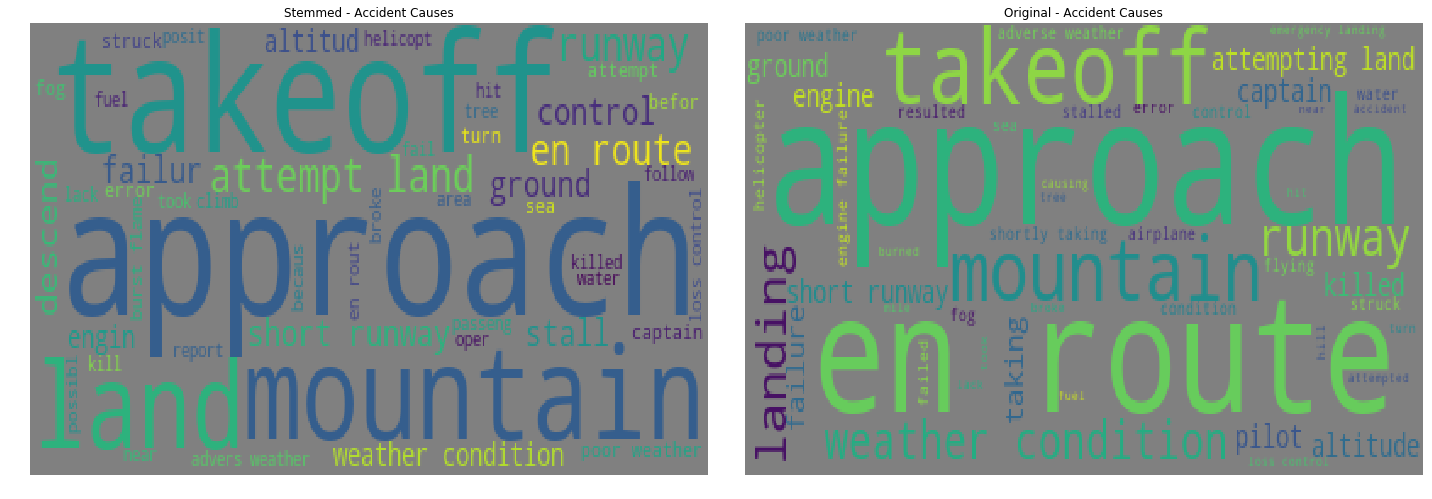

In [46]:
wc = WordCloud(background_color='grey', max_words=50, stopwords=stop_words)
wc_ = WordCloud(background_color='grey', max_words=50, stopwords=stop_words)

wc.generate(stemmed_corpus)
wc_.generate(corpus)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,20))

ax1.imshow(wc, extent=[0,150,0,1], aspect='100')
ax1.set_title('Stemmed - Accident Causes')
ax1.set_axis_off()

ax2.imshow(wc_, extent=[0,150,0,1], aspect='100')
ax2.set_title('Original - Accident Causes')
ax2.set_axis_off()
plt.tight_layout()

plt.show()